# Exercițiul 1

Scrieţi un program în Python care să preia ca input un fişier .csv cu o listă oarecare şi să aibă ca output un număr
predeterminat de elemente din acea listă, fără repetiţie.

In [6]:
import pandas as pd
import random
import numpy as np

def read_csv_as_list(file_path, column_name):
    df = pd.read_csv(file_path)
    return df[column_name].tolist()

def generate_random_sample(data_list, sample_size):
    sample_size = min(sample_size, len(data_list))

    sample = np.random.choice(data_list, size=sample_size, replace=False)

    return sample

if __name__ == "__main__":
    file_path = 'lista.csv'
    column_name = 'coloana'
    lista = read_csv_as_list(file_path, column_name)

    numar_elemente = 2
    esantion = generate_random_sample(lista, numar_elemente)

    print(esantion)


['Alexandra' 'Ana']


# Exercitiul 2
Doi prieteni joacă următorul joc, după următoarele reguli:
Pasul 1. Primul jucător aruncă cu o monedă.

- Dacă pică stemă, cel de-al doilea trebuie să arunce cu zarul şi să-i dea primului o sumă egală z − 3 $
, unde z
este rezultatul aruncării cu zarul (a da o sumă negativă este echivalent cu a lua opusul acelei sume). Jocul
se încheie aici.

- Dacă pică ban, atunci primul jucător trebuie să-i dea celui de-al doilea 0.5 $.

Pasul n. În caz că jocul nu s-a încheiat, se reia pasul 1.

Astfel, jocul se opreşte la pasul corespunzător obţinerii stemei de către primul jucător.


### a.Ce fel de distribuţie urmează N, numărul de paşi ai jocului?



Răspuns: N, numărul de pași ai jocului, reprezintă numărul de aruncări până când primul jucător obține "stemă". Distribuția descrie numărul de încercări necesare pentru a obține primul succes într-o serie de încercări independente, fiecare având aceeași probabilitate p de succes. ÎN cazul aruncarii unei monezi probabilitatea aparitiei stemei (succes) este p=0.5.

Astfel, N urmează o distribuție cu parametru p=0.5.

### b.Simulaţi în Python un astfel de joc. Variabilele care ne interesează sunt N şi suma totală S pe care cel de-al doilea jucător trebuie să i-o dea primului.


In [7]:
import numpy as np

def simulare_joc(p_stema=0.5):
    N = 0
    S = 0
    while True:
        N += 1
        aruncare_moneda = np.random.rand()
        if aruncare_moneda < p_stema:
            zar = np.random.randint(1, 7)
            S += zar - 3
            break
        else:
            S -= 0.5

    return N, S

N, S = simulare_joc()
print(f"Nr de pasi: {N}, Suma totala: {S}")


Nr de pasi: 3, Suma totala: 1.0



### c.Prin simularea unui număr mare de astfel de jocuri, determinaţi cu aproximaţie media lui S şi reprezentaţi grafic (printr-o histogramă) distribuţia acesteia.


Media lui S: -0.00855


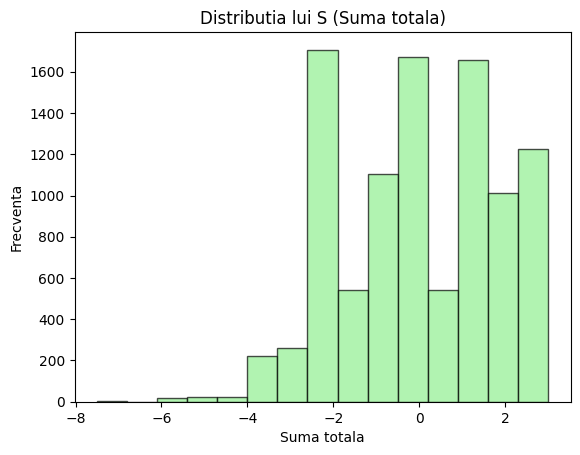

In [12]:
import matplotlib.pyplot as plt

numar_jocuri = 10000
rezultate_N = []
rezultate_S = []

for _ in range(numar_jocuri):
    N, S = simulare_joc()
    rezultate_N.append(N)
    rezultate_S.append(S)

media_S = np.mean(rezultate_S)
print(f"Media lui S: {media_S}")

plt.hist(rezultate_S, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title("Distributia lui S (Suma totala)")
plt.xlabel("Suma totala")
plt.ylabel("Frecventa")
plt.show()


### d.Ce se întâmplă dacă moneda este măsluită? Încercaţi să refaceţi pct. c) cu o probabilitate de apariţie a stemei p = 0.3, respectiv p = 0.7.

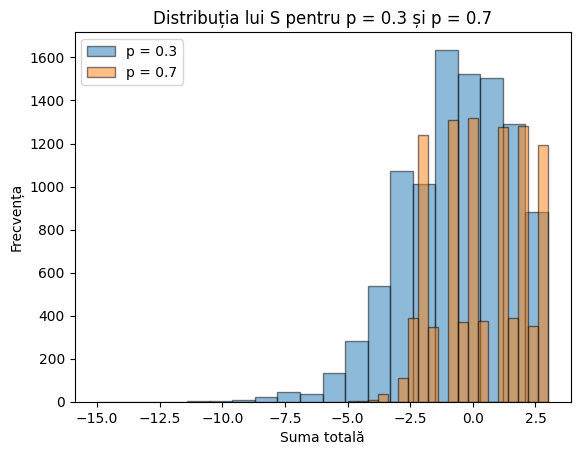

In [14]:
rezultate_S_p3 = []
for _ in range(numar_jocuri):
    _, S = simulare_joc(p_stema=0.3)
    rezultate_S_p3.append(S)

rezultate_S_p7 = []
for _ in range(numar_jocuri):
    _, S = simulare_joc(p_stema=0.7)
    rezultate_S_p7.append(S)

plt.hist(rezultate_S_p3, bins=20, alpha=0.5, label='p = 0.3', edgecolor='black')
plt.hist(rezultate_S_p7, bins=20, alpha=0.5, label='p = 0.7', edgecolor='black')
plt.title("Distribuția lui S pentru p = 0.3 și p = 0.7")
plt.xlabel("Suma totală")
plt.ylabel("Frecvența")
plt.legend()
plt.show()


# Exercițiul 3

Într-o frizerie, trei frizeri îşi tund clienţii cu următoarele viteze medii: primul cu 3 clienţi pe oră, al doilea cu 6 pe
oră iar al treilea cu 4 pe oră. Astfel, timpul de servire al unui client este modelat de distribuţii exponenţiale cu parametrii
λ1 = 3 h^(-1)
, λ2 = 6 h^(-1)
, respectiv λ3 = 4 h^(-1)

, iar probabilităţile de preluare a unui client de către un anumit frizer sunt

3/13, 6/13, respectiv 4/13 (de ce?). Fie X timpul de servire pentru un client.
Generaţi 10000 de valori pentru X, şi în felul acesta estimaţi media şi deviaţia standard a lui X. Realizaţi un grafic
aproximativ al densităţii distribuţiei lui X.

Media estimata a lui X: 0.23178208987612806
Deviatia standard estimata a lui X: 0.24993482118717023


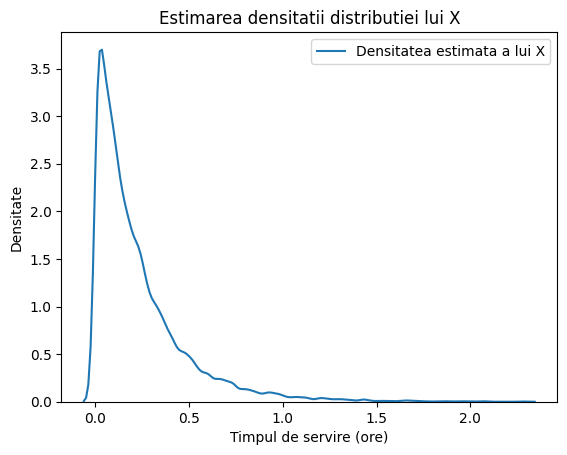

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lambdas = [3, 6, 4]
probabilitati = [3/13, 6/13, 4/13]

numar_simulari = 10000
timpuri_servire = []

for _ in range(numar_simulari):
    frizer_ales = np.random.choice([0, 1, 2], p=probabilitati)
    timp_servire = np.random.exponential(scale=1/lambdas[frizer_ales])
    timpuri_servire.append(timp_servire)

media_X = np.mean(timpuri_servire)
dev_standard_X = np.std(timpuri_servire)

print(f"Media estimata a lui X: {media_X}")
print(f"Deviatia standard estimata a lui X: {dev_standard_X}")

sns.kdeplot(timpuri_servire, label="Densitatea estimata a lui X", bw_adjust=0.5)
plt.title("Estimarea densitatii distributiei lui X")
plt.xlabel("Timpul de servire (ore)")
plt.ylabel("Densitate")
plt.legend()
plt.show()
